In [58]:
print('float = %5.3f' % 1.234499)

float = 1.234


In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0)
import numpy as np
import uncertainties as u
from uncertainties import unumpy

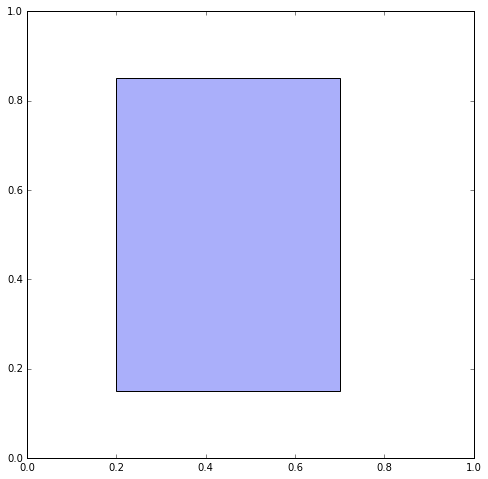

In [82]:
# plot a rectangle: args are: [(bottom left corner cords), width, height, args]
rectangle = plt.Rectangle((.2, .15), .5, .7, facecolor = "#aaaffa") # not sure what the
# matplotlib color naming sceme is, but aaaffa is nice!

plt.gca().add_patch(rectangle) # add the recatngle to a new figure
plt.show() # show the plot

In [83]:
# ok great we can make a rectangle....
# time to talk about fieldspace
# first here are the calibration values for the coils:
xFieldGain = u.ufloat(42.24e-6, 0.08e-6) # T/A
yFieldGain = u.ufloat(45.99e-6, 0.09e-6) # T/A
zFieldGain = u.ufloat(132.16e-6, 0.08e-6) # T/A

# and here are the field values for each of the 4 laser crossings (one for each mirror)
crossings = np.genfromtxt('crossingData1.csv', delimiter=',', skip_header=True, usecols=(1,2,3,4))
print(crossings)
#each row represents a coil's data (x,y,z)
# each column represents a point in 3d field space at which we found optical 0
# turn crossings from miliamps to amps
crossings *= 1e-3
# turn crossings from amps to field with the calibration data:
crossings[0] *= xFieldGain.n # first row of crossings is the x data multiply by the field gain to get tesla
crossings[1] *= yFieldGain.n # do the same for the y and z values
crossings[2] *= zFieldGain.n

[[-380.6 -990.     0.  -419.1]
 [-990.  -410.6 -380.1    0. ]
 [ 293.   354.    68.     0. ]]


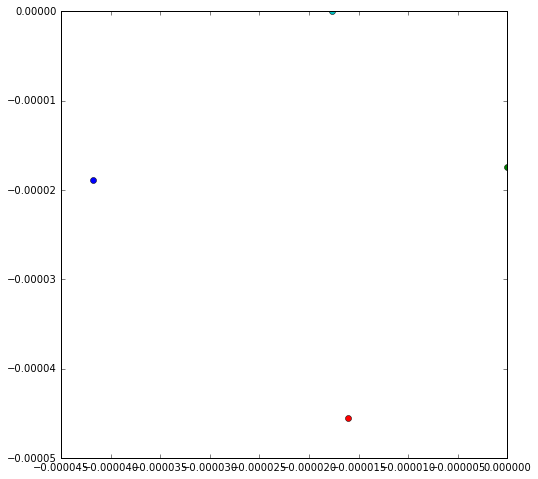

In [84]:
# plot the crossings in current space: (for now just use the x and y)
# the pairs are on the ends and in the middle
pair_one = crossings[0:2,1:3] # first grab the middle
pair_two = crossings[0:2,::3] # grab the whole row but step by 3 to skip the middle two.
#print(pair_one, '\n \n', pair_two)
plt.plot(pair_one[0,0],pair_one[1,0], 'o')
plt.plot(pair_one[0,1],pair_one[1,1], 'o')
plt.plot(pair_two[0,0],pair_two[1,0], 'o')
plt.plot(pair_two[0,1],pair_two[1,1], 'o')

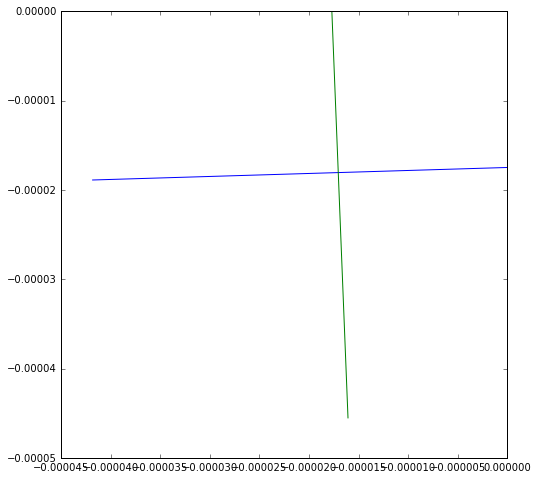

In [85]:
# now plot the lines so we can seen th crossings:
plt.plot(pair_one[0],pair_one[1])
plt.plot(pair_two[0], pair_two[1])
plt.show()

In [86]:
# find the slope of a pair
def slope(pair):
    m = ((pair[1,0]-pair[1,1])/(pair[0,0]-pair[0,1]))
    return(m)
# test for orthgonality. The slope of one line should be -1 devided by the slope of the other line. 
# it's possible that misllignments in the z axis could cause an orthogonality problem 
# (as could imperfections in the mirror's geometry).
print(-1/slope(pair_one), slope(pair_two))

-29.812325559 -27.9971590909


In [106]:
# calculate the intercepts:
def intercept(pair):
    m = slope(pair)
    b = pair[1,0] - (m * pair[0,0])
    return b

# now find the point of intersection!
def intersection(pair1, pair2):
    # this has terrible effency with all the function calls
    x = (intercept(pair1) - intercept(pair2))/(slope(pair2) - slope(pair1)) 
    y = slope(pair1)*x + intercept(pair1)
    return(x, y)

print(intersection(pair_one, pair_two))
#find the magnitude off the field 
x, y = intersection(pair_one, pair_two)
magnitude= (x**2+y**2)**.5
print('Field magnitude in Tesla = %E' % magnitude)

(-1.7057969382810161e-05, -1.805297742160767e-05)
Field magnitude in Tesla = 2.483716E-05
